<span style="font-size: 24px;">Targeting the Right Players: A Data-Driven Approach to Minimize Recruitment Efforts</span>

Investigating player behaviour from video games can provide insights into how people explore, learn, and interact in virtual spaces. In this report, data collected by a research team at the University of British Columbia will  be explored. This research team used a custom Minecraft server to gather the data, recording data about each player and their play sessions. 
However, the project has limited resources such as server capacity and software licensing and therefore relies on recruiting players that will engage with the game and contribute meaningful data. Not all players engage equally, with some contributing more playtime than others. So to narrow down the target audience to minimize recuiting efforts, this report will explore the following question: "what player characteristics demonstrate the highest levels of engagement or interaction within the game?" 

In [1]:
#loading all necessary packages
library(tidyverse) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#Here I am loading the players and session data

players <- read_csv("https://raw.githubusercontent.com/mxriesong/dsci100project/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/mxriesong/dsci100project/refs/heads/main/data/sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [3]:
#In this cell, I'm organizing the data
#Sessions data is a list of individual play sessions so I am organizing the table by hashedEmail to summarise total minutes played as well as number of sessions

players <- players |>
mutate(experience = as_factor(experience), gender = as_factor(gender))
players

sessions <- sessions |>
 mutate(
    start_time_parsed = dmy_hm(start_time),
    end_time_parsed = dmy_hm(end_time),
    session_length_mins = as.numeric(difftime(end_time_parsed, start_time_parsed, units = "mins"))
  )
total_playtime <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    total_minutes = sum(session_length_mins, na.rm = TRUE),
    session_count = n()
  )
total_playtime


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,total_minutes,session_count
<chr>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,106,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,418,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,70,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,10,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,50,1
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,1217,41
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,18,1


In [4]:
#Here I am simply merging the two data frames to match the data in sessions to the unique players in the game
merged_data <- merge(players, total_playtime, by = "hashedEmail")
merged_data

hashedEmail,experience,subscribe,played_hours,name,gender,Age,total_minutes,session_count
<chr>,<fct>,<lgl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,106,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,30,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,11,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,418,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,TRUE,1.0,Knox,Male,17,70,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,FALSE,0.1,Callum,Male,19,10,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,Amateur,TRUE,0.7,Hugo,Female,21,50,1
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,Amateur,TRUE,17.2,Kyrie,Male,14,1217,41
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,Beginner,FALSE,0.2,Aurora,Female,37,18,1


In [5]:
#Now, I'm arranging the data from highest total minutes played to lowest
#This is so that I can take the top 50% of contributors later to analyze the kinds of players that contribute a large amount of data
merged_data <- merged_data |>
arrange(desc(total_minutes))

merged_data

hashedEmail,experience,subscribe,played_hours,name,gender,Age,total_minutes,session_count
<chr>,<fct>,<lgl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<int>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,Regular,TRUE,223.1,Hiroshi,Male,17,14671,219
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,Regular,TRUE,218.1,Akio,Non-binary,20,14132,95
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,Regular,TRUE,178.2,Piper,Female,19,11827,147
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,Amateur,TRUE,150.0,Delara,Female,16,9947,159
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,Amateur,TRUE,56.1,Dana,Male,23,4795,310
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,Amateur,TRUE,53.9,Alex,Male,17,3873,130
a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,Amateur,TRUE,48.4,Xander,Female,17,3232,37
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,Amateur,TRUE,32.0,Sidney,Male,22,2366,79
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Pro,TRUE,30.3,Morgan,Male,9,2019,27


In [6]:
#Here I am slicing the first 63 rows since there is a total of 125 to get the top 50%
top_50p <- merged_data |>
  arrange(desc(total_minutes)) |>
  slice_head(n = 63)

#This is where I begin to analyze, starting with the representation of different experience types in the top 50%
top_50p_experience <- top_50p |>
  count(experience, name = "experience_count_in_top_50p")

top_50p_experience <- top_50p_experience %>%
  mutate(percent_in_top_50p = round(100 * experience_count_in_top_50p / sum(experience_count_in_top_50p), 1))

top_50p_experience

experience,experience_count_in_top_50p,percent_in_top_50p
<fct>,<int>,<dbl>
Pro,6,9.5
Veteran,10,15.9
Amateur,22,34.9
Regular,11,17.5
Beginner,14,22.2


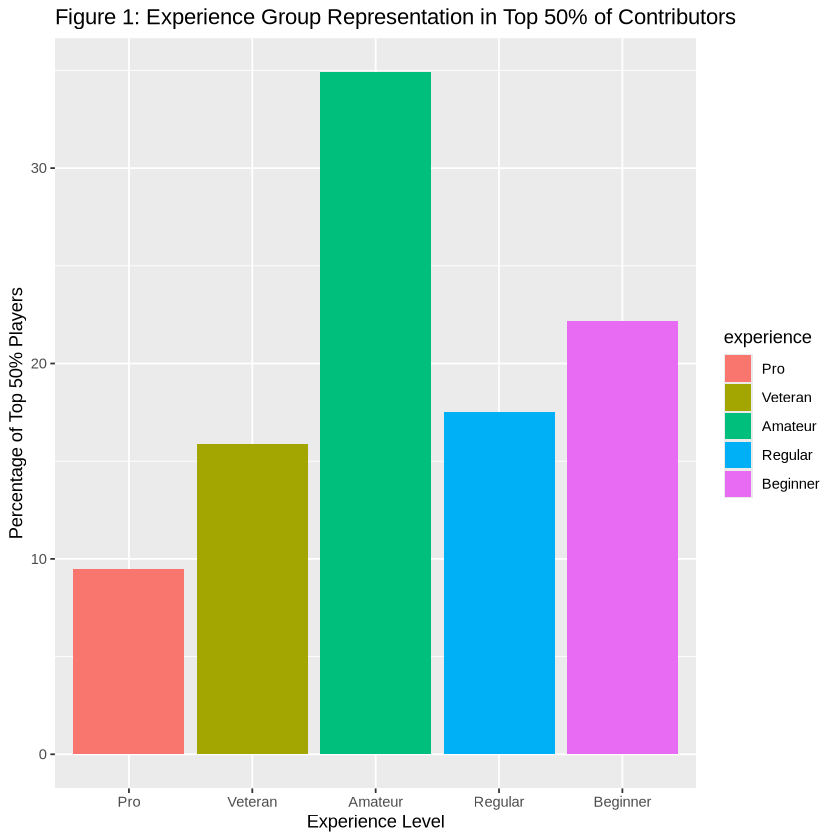

In [7]:
#Here I am creating a bar plot to help visualize the percentage of each experience type in the top 50%
experience_plot <- ggplot(top_50p_experience, aes(x = experience, y = percent_in_top_50p, fill = experience)) +
  geom_col() +
  labs(
    title = "Figure 1: Experience Group Representation in Top 50% of Contributors",
    x = "Experience Level",
    y = "Percentage of Top 50% Players")

experience_plot

In [8]:
#Here I am doing the same thing but with subscription type
top_50p_subscribe <- top_50p |>
  count(subscribe, name = "subscribe_count_in_top_50p")

top_50p_subscribe <- top_50p_subscribe %>%
  mutate(subscribe_percent_in_top_50p = round(100 * subscribe_count_in_top_50p / sum(subscribe_count_in_top_50p), 1))

top_50p_subscribe

subscribe,subscribe_count_in_top_50p,subscribe_percent_in_top_50p
<lgl>,<int>,<dbl>
FALSE,11,17.5
TRUE,52,82.5


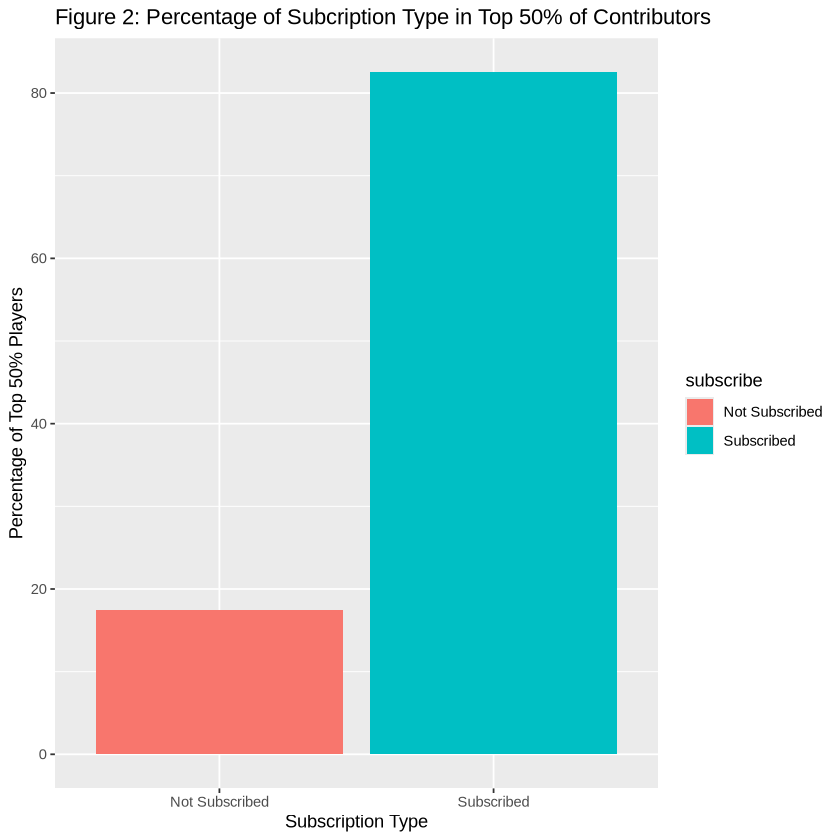

In [9]:
#Here, I am changing TRUE/FALSE to Subscribed/Not Subscribed to make it clearer to others what the values indicate
top_50p_subscribe <- top_50p_subscribe |>
  mutate(subscribe = ifelse(subscribe == TRUE, "Subscribed", "Not Subscribed"))

subscribe_plot <- ggplot(top_50p_subscribe, aes(x = subscribe, y = subscribe_percent_in_top_50p, fill = subscribe)) +
  geom_col() +
  labs(
    title = "Figure 2: Percentage of Subcription Type in Top 50% of Contributors",
    x = "Subscription Type",
    y = "Percentage of Top 50% Players")

subscribe_plot

In [10]:
#Repeating the same process again for gender
top_50p_gender <- top_50p |>
  count(gender, name = "gender_count_in_top_50p")

top_50p_gender <- top_50p_gender %>%
  mutate(gender_percent_in_top_50p = round(100 * gender_count_in_top_50p / sum(gender_count_in_top_50p), 1))

top_50p_gender

gender,gender_count_in_top_50p,gender_percent_in_top_50p
<fct>,<int>,<dbl>
Male,37,58.7
Female,17,27.0
Non-binary,4,6.3
Prefer not to say,3,4.8
Agender,1,1.6
Two-Spirited,1,1.6


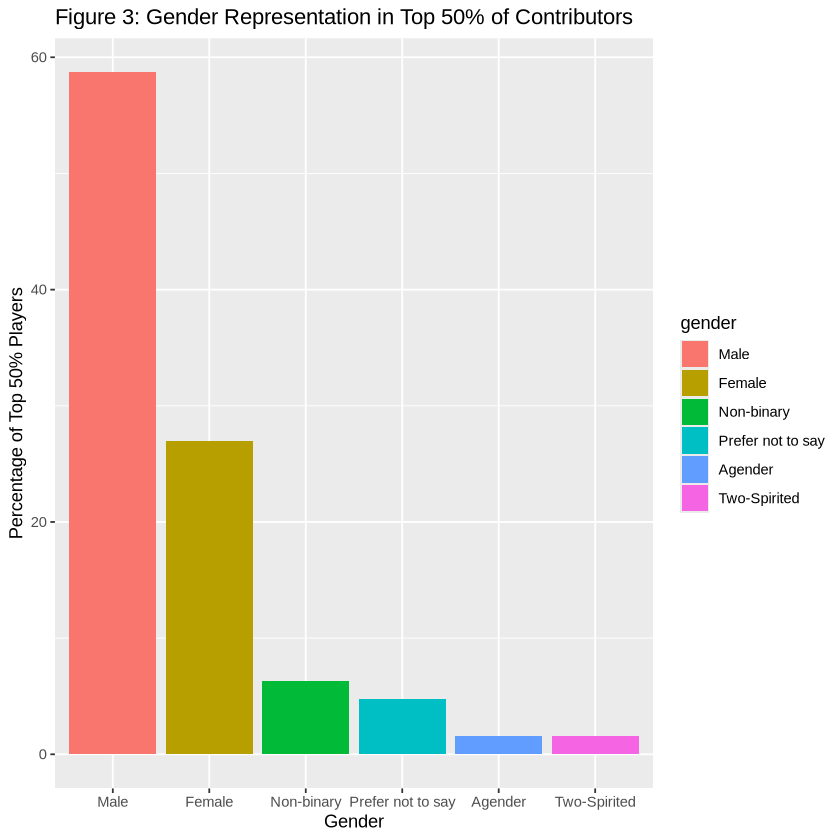

In [11]:
gender_plot <- ggplot(top_50p_gender, aes(x = gender, y = gender_percent_in_top_50p, fill = gender)) +
  geom_col() +
  labs(
    title = "Figure 3: Gender Representation in Top 50% of Contributors",
    x = "Gender",
    y = "Percentage of Top 50% Players")

gender_plot

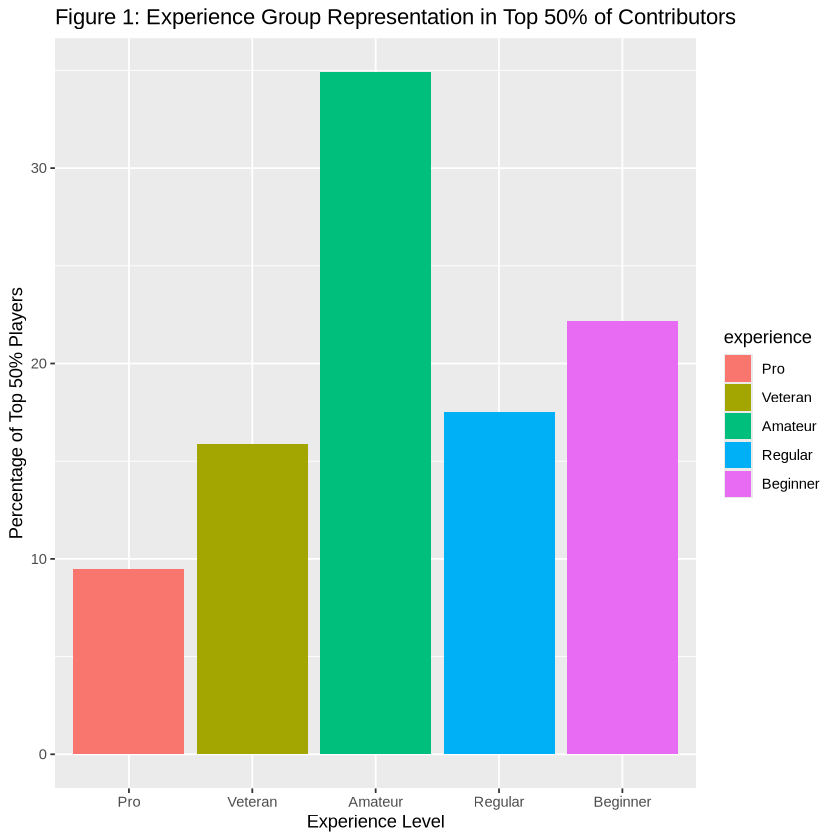

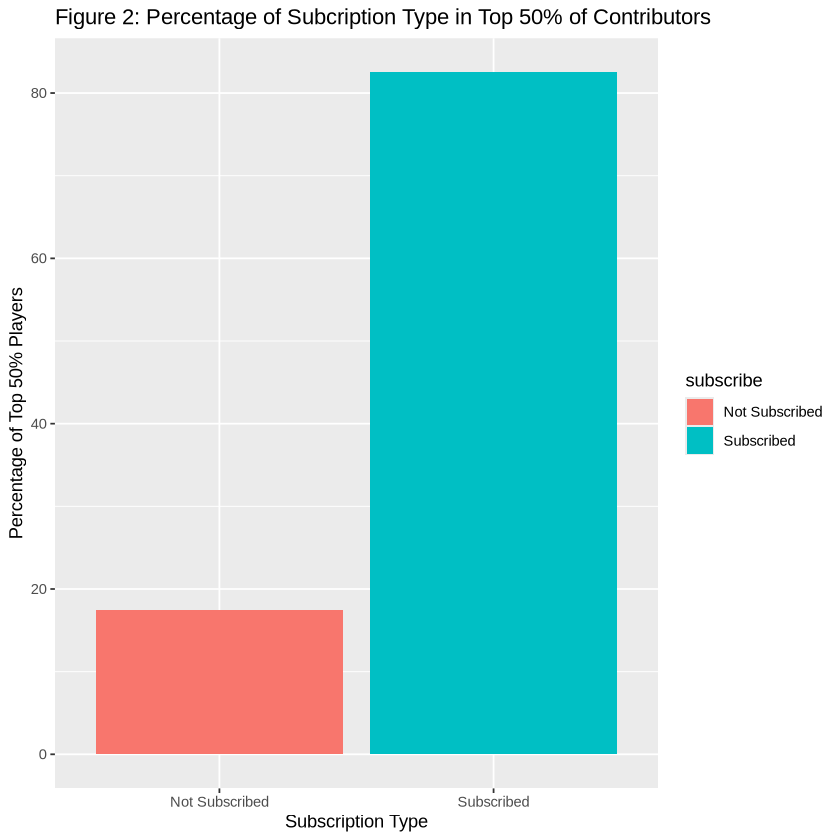

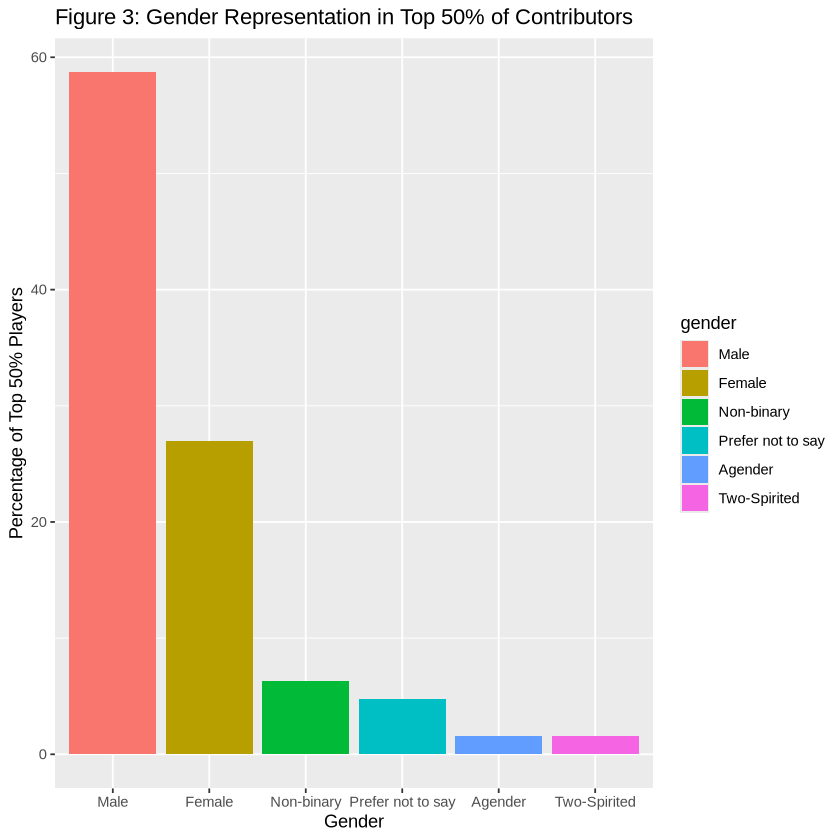

In [12]:
#This is just to have each plot side by side to see what kinds of players make up most of the top 50%
experience_plot
subscribe_plot
gender_plot

My analysis examined the representation of different player characteristics among the top 50% of data contributors, focusing on experience level, subscription status, and gender. The findings reveal several interesting patterns. To begin, amateur players made up the largest proportion of top contributors, followed by beginners and regular players. Surprisingly, professional players accounted for the smallest share, suggesting that high contribution is not necessarily linked to expertise. 

In terms of subscription status, the results were more predictable: a significant majority (over 80%) of top contributors were subscribed players. This suggests that subscription provides either additional opportunities to contribute or correlates with greater commitment and engagement. The gender distribution showed that male players comprised the majority of top contributors (around 58%), while female players made up approximately 26%. Other gender identities, including non-binary, agender, and Two-Spirited players, were represented but in much smaller proportions.

Some of these findings aligned with our expectations—particularly the strong contribution from subscribed users. However, the high representation of amateur and beginner players among top contributors was less expected, raising questions about the behaviors and motivations of newer players compared to seasoned ones. Additionally, while the male dominance is consistent with broader trends in gaming demographics, the presence of diverse gender identities—though smaller—highlights areas for potential growth in inclusivity and community design.

These findings have several implications. From a recruitment and engagement standpoint, targeting amateur and beginner players may yield high data contribution, despite their lower experience levels. Furthermore, the subscription model appears to be a strong indicator of engagement, suggesting that subscribed players should be prioritized in data collection efforts. The underrepresentation of diverse gender identities may point to barriers in game access or culture, and addressing these could enhance both inclusivity and participation.

Finally, this analysis opens the door to future research questions. For example, why do amateurs and beginners contribute more than pros? What behavioral patterns drive higher contribution within different demographics? How can game environments be optimized to support underrepresented groups and maintain high engagement across all player types? These questions could guide future work on player engagement, retention, and equitable game design.